In [31]:
# Useful imports
import numpy as np
import matplotlib.pyplot as plt

import camb # Import the CAMB module
from camb.symbolic import *

# CMB Parameter Sensitivity

The Standard Cosmological Model, i. e. the $\Lambda CDM$ model, is based on six foundamental parameters:
- $A_s$: scalar amplitude of the power spectrum of inial curvature;
- $n_s$: scalar spectral index of the power spectrum of inial curvature, which for perfect De Sitter expansion (exponensial growth) would exactly be 1;
- $\tau$: optical depth of the Universe, i.e. it accounts for how likely a photon may scatter in his path;
- $H_0$: value of the Hubble constant at the present epoch;
- $\Omega_bh^2$: baryon density parameter multiplied by the dimensioneless Hubble constant;
- $\Omega_ch^2$: cold dark matter density parameter multiplied by the dimensioneless Hubble constant;

In [32]:
# Set up a new set of parameters for CAMB using Planck 2018 cosmological parameters
pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

In [33]:
# Calculate results for these parameters
results = camb.get_results(pars)

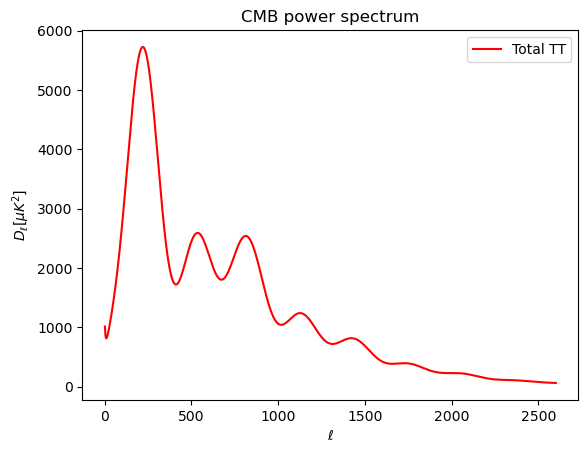

In [34]:
# Plot the CMB temperature power spectrum
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCL=powers['total'] # Get the total CMB power spectrum
ells = np.arange(totCL.shape[0])

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') # Taking from l=2 since l=0,1 are not physical
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.show()


Note that TT stands for Temperature - Temperature: it describes how the temperature fluctuations in the CMB are distributed across different angular scales. Essentially, it quantifies the variation in temperature as a function of scale.

Recall that:
$$
D_l = \frac{l(l+1)C_l}{2\pi}
$$

# WARNING

In [35]:
# Monopole and dipole aren't 0 by default????
print('Monopole:', totCL[0,0])
print('Dipole:', totCL[1,0])

Monopole: 0.0
Dipole: 0.0


In [36]:
'''
# Getting all the C_ls for the temperature power spectrum
C_l = results.get_cmb_power_spectra(pars, raw_cl=True)
'''

'\n# Getting all the C_ls for the temperature power spectrum\nC_l = results.get_cmb_power_spectra(pars, raw_cl=True)\n'

In [37]:
'''
C_ls = C_l['total']

# Plotting the C_ls
plt.figure()
plt.plot(ells, C_ls[:,0], label='TT')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.title('CMB power spectrum')
plt.show()
'''

"\nC_ls = C_l['total']\n\n# Plotting the C_ls\nplt.figure()\nplt.plot(ells, C_ls[:,0], label='TT')\nplt.legend()\nplt.xlabel(r'$\\ell$')\nplt.ylabel(r'$C_{\\ell}$')\nplt.title('CMB power spectrum')\nplt.show()\n"

In [38]:
# Contribution from ISW effect
pars1 = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

pars1.SourceTerms.counts_ISW = False

In [39]:
results1 = camb.get_results(pars1)
powers1 = results1.get_cmb_power_spectra(pars1, CMB_unit='muK')
totCL1=powers1['total'] # Get the total CMB power spectrum

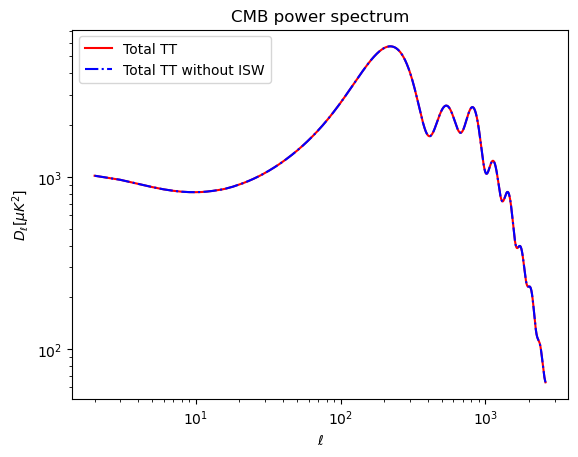

In [40]:
# Plot the CMB power spectrum VS the one without ISW effect
plt.figure()
plt.plot(ells[2:],totCL[2:,0], color='r', label='Total TT') 
plt.plot(ells[2:],totCL1[2:,0], color='b',ls = '-.',label='Total TT without ISW')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [41]:
# Monopole, dipole and ISW effects
monopole_source, ISW, doppler, quadrupole_source = get_scalar_temperature_sources()

In [42]:
early_ISW = sympy.Piecewise( (ISW, 1/a-1> 30),(0, True))  #redshift > 30
late_ISW = ISW - early_ISW

names = ['mon','ISW','eISW','LISW','dop', 'Q']
pars.set_custom_scalar_sources([monopole_source, ISW,early_ISW, late_ISW,doppler,quadrupole_source], 
        source_names =names)

data= camb.get_results(pars)
dic = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

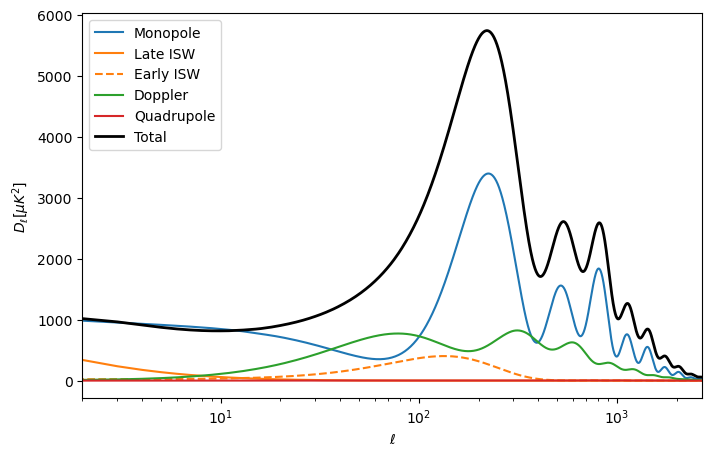

In [43]:
ls =np.arange(dic['TxT'].shape[0])
plt.figure(figsize=(8,5))
plt.semilogx(ls,dic['monxmon'], color='C0')
plt.semilogx(ls,dic['LISWxLISW'], color='C1')
plt.semilogx(ls,dic['eISWxeISW'], ls='--', color='C1')
plt.semilogx(ls,dic['dopxdop'],color='C2')
plt.semilogx(ls,dic['QxQ'], color='C3')
plt.semilogx(ls,dic['TxT'], lw=2, color='k')
plt.xlabel('$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.xlim(2, ls[-1])
plt.legend(['Monopole','Late ISW','Early ISW','Doppler','Quadrupole', 'Total'], loc = 'upper left');

# Variotion of Parameters

In [44]:
# Definingthe standard set of parameters with Planck 2018 cosmological parameters
std_pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

# Calculate results for these parameters
std_results = camb.get_results(std_pars)

# Computing the CMB power spectrum
std_powers = std_results.get_cmb_power_spectra(std_pars, CMB_unit='muK')
std_totCL=std_powers['total'] # Get the total CMB power spectrum
ells = np.arange(std_totCL.shape[0]) # Get the list of multipoles


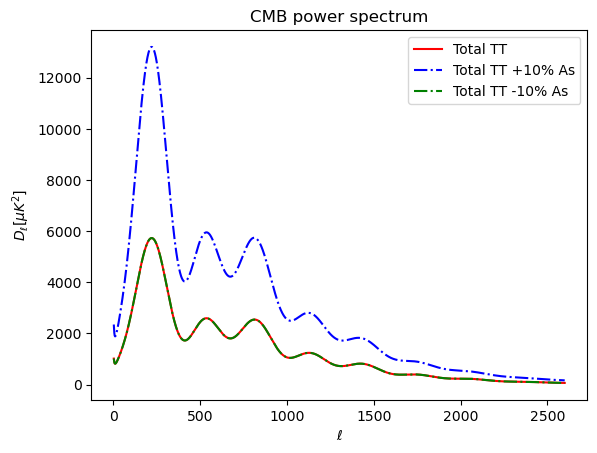

In [48]:
# Variang As by +/-10%
As_pars_plus  = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
As_pars_minus = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
As_pars_plus.InitPower.As *= 2.3106039
As_pars_minus.InitPower.As *= 1.8904941

# Calculate results for these parameters
As_results_plus = camb.get_results(As_pars_plus)
As_results_minus = camb.get_results(As_pars_minus)

# Computing the CMB temperature power spectrum for the modified parameters
var_powers_plus = As_results_plus.get_cmb_power_spectra(As_pars_plus, CMB_unit='muK')
var_powers_minus = As_results_minus.get_cmb_power_spectra(As_pars_minus, CMB_unit='muK')

# Get the total CMB power spectrum
var_totCL_plus = var_powers_plus['total']
var_totCL_minus = var_powers_minus['total']

# Plot the CMB power spectrum
plt.figure()
plt.plot(ells[2:],std_totCL[2:,0], color='r', label='Total TT') # Taking from l=2 since l=0,1 are not physical
plt.plot(ells[2:],var_totCL_plus[2:,0], color='b',ls = '-.',label='Total TT +10% As')
plt.plot(ells[2:],var_totCL_minus[2:,0], color='g',ls = '-.',label='Total TT -10% As')
plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_{\ell} [\mu K^2]$')
plt.title('CMB power spectrum')
plt.show()